In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)

current_dir = os.getcwd()
image_dir = os.path.join(current_dir, 'images')

%matplotlib inline

In [3]:
#get list of all images
img_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpeg')]

#load all images
imgs = []
for f in img_files:
    imgs.append(cv2.imread(f))

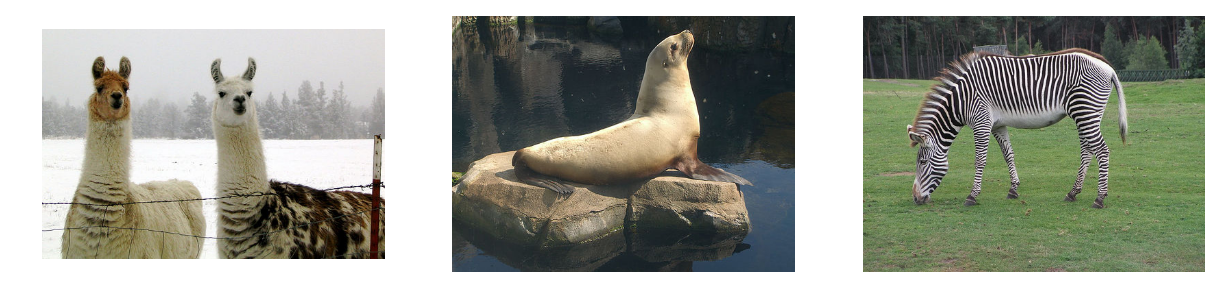

In [4]:
#plot images
fig = plt.figure(figsize=(15,6))
for i, img in enumerate(imgs):
    fig.add_subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

In [5]:
from model import AlexNet
from caffe_classes import class_names

In [6]:
x = tf.placeholder(tf.float32, [1, 227, 227, 3])
keep_prob = tf.placeholder(tf.float32)
model = AlexNet(x, keep_prob, 1000, [])

score = model.fc8

softmax = tf.nn.softmax(score)

error: /build/buildd/opencv-2.4.9+dfsg/modules/imgproc/src/color.cpp:3648: error: (-215) scn == 3 || scn == 4 in function cvtColor


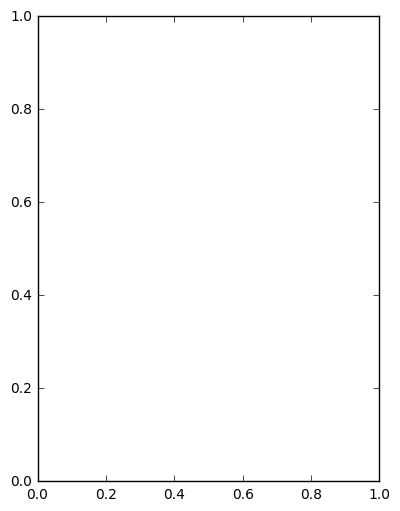

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    model.load_initial_weights(sess)
    fig2 = plt.figure(figsize=(15,6))
    
    for i, image in enumerate(imgs):
        image = cv2.resize(image.astype(np.float32), (227, 227))
        image -= imagenet_mean
        image = image.reshape((1, 227, 227, 3))
        probs = sess.run(softmax, feed_dict={x: image, keep_prob: 1})
        class_name = class_names[np.argmax(probs)]
        fig2.add_subplot(1,3,i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Class: " + class_name + ", probability: %.4f" %probs[0,np.argmax(probs)])
        plt.axis('off')